In [1]:
#Importamos las librerias para el procesamiento de datos
import numpy as np
import os
from matplotlib import pyplot as plt
import pandas as pd
import shutil as sh
from sklearn.model_selection import train_test_split


#importando libreria pandas alias pd
import pandas as pd
#labelEncoder sirve para convertir datos categoricos a numericos para poder hacer mejores calculos
from sklearn.preprocessing import LabelEncoder
#datatime sirve para poder trabajar con fechas
from datetime import datetime

In [2]:
#Importamos el dataset
data = pd.read_csv('./LAB-02.csv', delimiter=',')

In [3]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 30)  # Mostrar todas las filas (60 -> None)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas (20 -> None)
#mostramos el dataset
data

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [4]:
#Leemos el tipo de datos que tiene el dataset y vemos los datos faltantes que podrian tener las columnas X
print('INFORMACION DE TIPO DE DATOS')
data.info()
print('\nDATOS VACIOS')
print(pd.isnull(data).sum())

INFORMACION DE TIPO DE DATOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB



PROCESAMOS DATOS DEL DATASET

In [5]:
#Movimiento de columna al final del dataset y verificacion de datos
# En este caso movemos nuestra Y predicha al final de las columnas que en este caso es "4206.0.1"
indice_columna = data.columns.get_loc('song_popularity')
columnas = list(data.columns)
columnas.pop(indice_columna)
columnas.append('song_popularity')
data = data[columnas]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
 14  song_popularity   18835 non-null  int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [7]:
#variables categoricas, donde convertimos a int64
columnas_categoricas = data.select_dtypes(include=['object']).columns
#variables fechas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns
#Procesamiento de frases o palabras a valores numericos para su procesamiento
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])
  # Mostramos los resultados del Dataset
# print(data)
data

,song_name,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,1561,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,73
1,5541,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,66
2,9638,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,76
3,1760,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,74
4,4988,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,6322,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300,60
18831,687,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265,60
18832,10447,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286,23
18833,4131,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323,55


In [8]:
# Convertimos a int64 a todos los valores de X
data = data.astype('int64', errors='ignore')

In [9]:
#Verificamos todos los datos del Dataset
print("INFORMACION")
print(data)
print("\nTIPOS DE DATOS")
data.info()
print("\nDATOS VACIOS")
print(pd.isnull(data).sum())

INFORMACION
       song_name  song_duration_ms  acousticness  danceability  energy  \
0           1561            262333             0             0       0   
1           5541            216933             0             0       0   
2           9638            231733             0             0       0   
3           1760            216933             0             0       0   
4           4988            223826             0             0       0   
...          ...               ...           ...           ...     ...   
18830       6322            159645             0             0       0   
18831        687            205666             0             0       0   
18832      10447            182211             0             0       0   
18833       4131            352280             0             0       0   
18834      11775            193533             0             0       0   

       instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0                     

In [10]:
# Por ultimo exportamos el dataset procesado ya sea para manejarlo de manera mas factible
data.to_csv('../LAB-02/database_songpopularity_procesado.csv', index=False)

1 REGRESION LINEAL MULTIVARIABLE

In [11]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

1.1 NORMALIZACION DE CARACTERISTICAS

In [12]:
#Importamos el dataset
df = pd.read_csv('./database_songpopularity_procesado.csv', delimiter=',')

# Mostramos los datos
df

,song_name,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,1561,262333,0,0,0,0,8,0,-4,1,0,167,4,0,73
1,5541,216933,0,0,0,0,3,0,-6,0,0,105,4,0,66
2,9638,231733,0,0,0,0,0,0,-7,1,0,123,4,0,76
3,1760,216933,0,0,0,0,0,0,-4,1,0,122,4,0,74
4,4988,223826,0,0,0,0,10,0,-5,1,0,172,4,0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,6322,159645,0,0,0,0,11,0,-16,1,0,113,4,0,60
18831,687,205666,0,0,0,0,11,0,-14,0,0,94,4,0,60
18832,10447,182211,0,0,0,0,0,0,-12,1,0,130,4,0,23
18833,4131,352280,0,0,0,0,3,0,-12,1,0,106,4,0,55


In [15]:
# Dividimos el dataset tanto para el entrenamiento de 80% y la parte de prueba de 20%
train_data, test_data = train_test_split(df, test_size = 0.2, random_state = 42)

# Dividimos los datos para X_test y y_test donde seran los datos para el prueba
X_test = test_data.iloc[:, :14]
y_test = test_data.iloc[:, 14]

# Dividimos los datos para X_train y y_train donde seran los datos para el entrenamiento
X_train = train_data.iloc[:, :14]
y_train = train_data.iloc[:, 14]
m = y_train.size


# Mostramos los datos que seran para el entrenamiento
print("Datos de X_train:")
print(X_train)
print('-' * 100)
print("Datos de y_train:")
print(y_train)

# Mostramos la cantidad de ejemplos que tienen X_train y y_train
print('-' * 80)
print("El 80% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 20% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(test_data)))

Datos de X_train:
       song_name  song_duration_ms  acousticness  danceability  energy  \
4501        6844            194728             0             0       0   
12204      12058            269146             0             0       0   
10675       3766            204013             0             0       0   
11146       4067             84371             0             0       0   
1664        6323            241560             0             0       0   
...          ...               ...           ...           ...     ...   
11284       8342            181069             0             0       0   
11964       6763            157421             0             0       0   
5390       11429            196666             0             0       0   
860         9310            311506             0             0       0   
15795       9626            241693             0             0       0   

       instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
4501            

In [16]:
# Mostramos los datos de entrenamiento X_train
X_train

,song_name,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
4501,6844,194728,0,0,0,0,6,0,-13,1,0,175,4,0
12204,12058,269146,0,0,0,0,10,0,-4,0,0,108,4,0
10675,3766,204013,0,0,0,0,7,0,-4,1,0,175,4,0
11146,4067,84371,0,0,0,0,10,0,-13,0,0,148,4,0
1664,6323,241560,0,0,0,0,6,0,-5,1,0,170,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,8342,181069,0,0,0,0,7,0,-15,1,0,123,4,0
11964,6763,157421,0,0,0,0,9,0,-6,1,0,182,4,0
5390,11429,196666,0,0,0,0,7,0,-17,1,0,87,3,0
860,9310,311506,0,0,0,0,1,0,-6,1,0,102,4,0


Nomalizamos los valores de X aplicando la formula de Normalización para cada Xi, Desviación estandar y promedio de las caracteristicas

In [17]:
# Normalizamos los features X
def featureNormalize(X):
  X_norm = X.copy()
  mu = np.zeros(X.shape[1]) # X.shape[1] = 17 columnas de 0 para el promedio
  sigma = np.zeros(X.shape[1]) # columnas de 0 para desviación estandar

  mu = np.mean(X, axis = 0) # calculamos el promedio de las caracteristicas, la media
  sigma = np.std(X, axis = 0) #std calcular la desviacion estandar
  X_norm = (X - mu) / sigma

  return X_norm, mu, sigma

In [18]:
# Llamamos a la funcion featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X_train)

# Mostramos los datos normalizados
X_norm

,song_name,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
4501,0.080544,-0.397171,NaN,NaN,NaN,NaN,0.199663,NaN,-1.583341,0.766775,NaN,1.904788,0.137696,NaN
12204,1.460824,0.844431,NaN,NaN,NaN,NaN,1.307672,NaN,0.771278,-1.304164,NaN,-0.427308,0.137696,NaN
10675,-0.734282,-0.242258,NaN,NaN,NaN,NaN,0.476665,NaN,0.771278,0.766775,NaN,1.904788,0.137696,NaN
11146,-0.654600,-2.238384,NaN,NaN,NaN,NaN,1.307672,NaN,-1.583341,-1.304164,NaN,0.964988,0.137696,NaN
1664,-0.057378,0.384182,NaN,NaN,NaN,NaN,0.199663,NaN,0.509653,0.766775,NaN,1.730751,0.137696,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.477103,-0.625059,NaN,NaN,NaN,NaN,0.476665,NaN,-2.106589,0.766775,NaN,0.094803,0.137696,NaN
11964,0.059101,-1.019606,NaN,NaN,NaN,NaN,1.030669,NaN,0.248029,0.766775,NaN,2.148440,0.137696,NaN
5390,1.294312,-0.364837,NaN,NaN,NaN,NaN,0.476665,NaN,-2.629838,0.766775,NaN,-1.158263,-3.235957,NaN
860,0.733358,1.551172,NaN,NaN,NaN,NaN,-1.185348,NaN,0.248029,0.766775,NaN,-0.636152,0.137696,NaN


In [19]:
# Mostramos resultados de los datos de media y desviación estandar

print("Media de los datos:")
print(mu)
print('-' * 100)
print("Desviación estandar de los datos:")
print(sigma)

Media de los datos:
song_name             6539.745819
song_duration_ms    218533.252323
acousticness             0.000000
danceability             0.000000
energy                   0.000000
instrumentalness         0.000000
key                      5.279201
liveness                 0.000000
loudness                -6.948036
audio_mode               0.629745
speechiness              0.000000
tempo                  120.276347
time_signature           3.959185
audio_valence            0.000000
dtype: float64
----------------------------------------------------------------------------------------------------
Desviación estandar de los datos:
song_name            3777.493742
song_duration_ms    59937.105639
acousticness            0.000000
danceability            0.000000
energy                  0.000000
instrumentalness        0.000000
key                     3.610080
liveness                0.000000
loudness                3.822275
audio_mode              0.482873
speechiness             

Despues de terminar la featureNormalize la funcion es aplicada los valores normalizados se cargan a X_norm

In [20]:
#Realizamos una gráfica de los datos
def graficarDatos(x, y, xlabel, ylabel):
  fig = plt.figure()
  plt.plot(x, y, 'ro')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

In [21]:
X_norm.shape

(15068, 14)

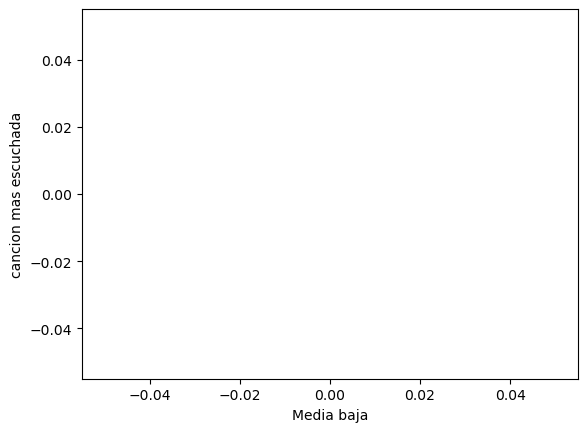

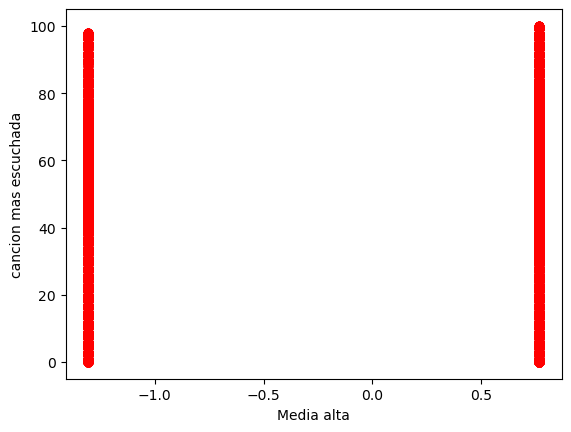

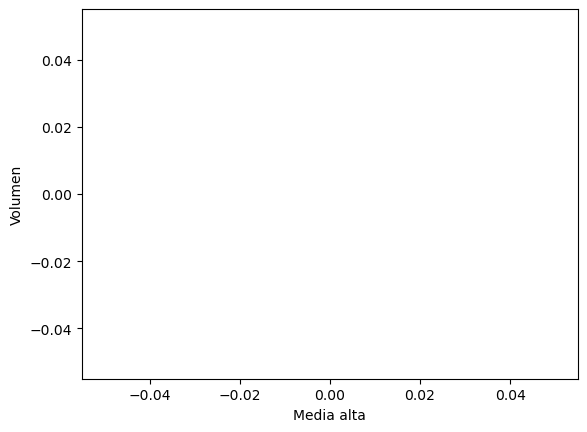

In [23]:
#Llamamos a la funcion de gráfica 10,9,10
xlabel1 = 'Media baja'
xlabel2 = 'Media alta'
ylabel1 = 'cancion mas escuchada'
ylabel2 = "Volumen"

graficarDatos(X_norm.iloc[:, 10], y_train, xlabel1, ylabel1)
graficarDatos(X_norm.iloc[:, 9], y_train, xlabel2, ylabel1)
graficarDatos(X_norm.iloc[:, 10], X_norm.iloc[:, 9], xlabel2, ylabel2)

2. DESCENCSO POR LA GRADIENTE

In [24]:
# Añadimos el termino de intersección, agregamos la columna de unos para los tethas 0
# Columna de 1 para X0

X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

#mostramos el resultado de X concatenado con X
X_ready[:10]

array([[ 1.        ,  0.08054393, -0.39717054,         nan,         nan,
                nan,         nan,  0.19966289,         nan, -1.58334073,
         0.76677502,         nan,  1.90478833,  0.13769555,         nan],
       [ 1.        ,  1.46082418,  0.84443096,         nan,         nan,
                nan,         nan,  1.30767154,         nan,  0.77127763,
        -1.3041635 ,         nan, -0.42730779,  0.13769555,         nan],
       [ 1.        , -0.73428204, -0.24225815,         nan,         nan,
                nan,         nan,  0.47666505,         nan,  0.77127763,
         0.76677502,         nan,  1.90478833,  0.13769555,         nan],
       [ 1.        , -0.65459958, -2.2383839 ,         nan,         nan,
                nan,         nan,  1.30767154,         nan, -1.58334073,
        -1.3041635 ,         nan,  0.9649884 ,  0.13769555,         nan],
       [ 1.        , -0.05737821,  0.38418184,         nan,         nan,
                nan,         nan,  0.19966289, 

Reemplazar nan con la Media de la Columna:

In [47]:
import numpy as np

theta = theta[:15]

def calcularCosto(X, y, theta):
    # Número de ejemplos de entrenamiento
    m = y.shape[0] 

    # Calculamos la hipótesis (predicciones) usando X y theta
    h = np.dot(X, theta)

    # Calculamos el costo J (error cuadrático medio)
    J = (1 / (2 * m)) * np.sum(np.square(h - y))

    return J

Realizamos algunas pruebas con la funcion de costo()

In [48]:
theta = np.array([1, 0.455000, -0.756070, -0.757633, -0.756850, 0.587486, 0.466985, 0.299630, -0.767157, -0.765891, -0.769412, -0.767717, 0.114549, -0.080046, 0.010156])

JJ = calcularCosto(X_ready, y_train, theta)
print(f"Con theta: {theta} se obtiene un costo de precio: {JJ}")

Con theta: [ 1.        0.455    -0.75607  -0.757633 -0.75685   0.587486  0.466985
  0.29963  -0.767157 -0.765891 -0.769412 -0.767717  0.114549 -0.080046
  0.010156] se obtiene un costo de precio: 0.0


In [52]:
theta_ = np.array([1,  4.55000460e-01, -7.56069714e-01, -7.57632795e-01,
  -7.56850002e-01,  5.87486110e-01,  4.66984592e-01,  2.99630382e-01,
  -7.67156852e-01, -7.65891304e-01, -7.69411714e-01, -7.67717201e-01,
   1.14549333e-01, -8.00461885e-02,  1.01556199e-02])

JJ_2 = calcularCosto(X_ready, y_train, theta_)
print(f"Cont theta_: { theta_ } se obtiene un Cierre de precio: {JJ_2}")


Cont theta_: [ 1.          0.45500046 -0.75606971 -0.7576328  -0.75685     0.58748611
  0.46698459  0.29963038 -0.76715685 -0.7658913  -0.76941171 -0.7677172
  0.11454933 -0.08004619  0.01015562] se obtiene un Cierre de precio: 0.0


FUNCION DESCENCSO POR LA GRADIENTE

In [53]:
#funcion por el Descenso por el Gradiente
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0] #33077 numero de ejemplos de entrenamiento
  theta = theta.copy() # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

  J_history = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_history.append(calcularCosto(X, y, theta))

  return theta, J_history

Seleccionado de coeficientes

Los valores de theta calculados son: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
****************************************************************************************************
Con un Cierre de Precio: 0.0


Text(0, 0.5, 'Cierre de costo J')

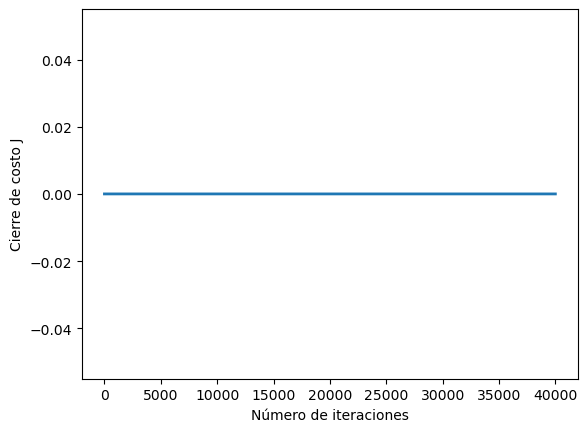

In [55]:
theta = np.zeros(15)

num_iter = 40000
alpha = 0.0001

theta, J_history = calcularDescensoGradiente(X_ready, y_train, theta, alpha, num_iter)
print(f"Los valores de theta calculados son: { theta }")
print("*" * 100)
print(f"Con un Cierre de Precio: { J_history[-1] }")

# Grafica de la convergencia del Cierre de Precio
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel("Número de iteraciones")
plt.ylabel("Cierre de costo J")

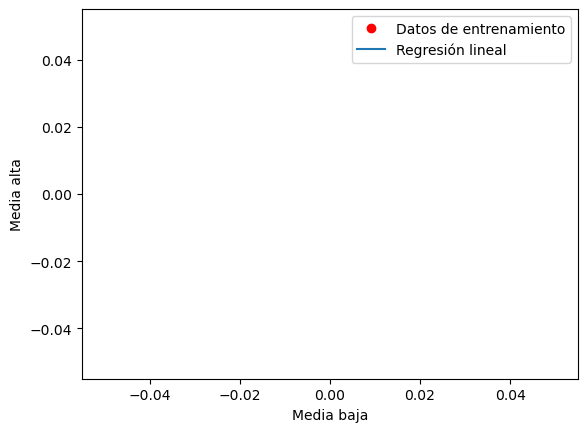

In [57]:
# Haciendo pruebas
graficarDatos(X_ready[:, 1], X_ready[:, 14], xlabel1, xlabel2)

plt.plot(X_ready[:, 1], np.dot(X_ready, theta), '-')

plt.legend(['Datos de entrenamiento', 'Regresión lineal'])

In [58]:
# Probamos algunas predicciones
p_array = np.dot([1, 9226,	4754,	4757,	4752,	4927,	234267435,	1881,	4747,	4733,	4746,	4743,	1,	1,	1], theta)
print(p_array)

nan


In [63]:
# Haciendo pruebas con valores
y_pred = np.dot([1, 0.455315, -0.764987,	-0.763564,	-0.765791,	0.184857,	0.095274,	0.150829,	-0.767157,	-0.765891,
                 -0.766444,	-0.767717,	0.114549,	-0.080046,	0.010156], theta)

print(y_pred)

nan


In [64]:
# Haciendo otras pruebas con diferentes valores
y_pred = np.dot([1, 1.731871,	2.189766,	2.181249,	2.196505,	-1.007530,	-0.992132,	-0.935309,	2.189193,	2.197494,	2.183491,
                 2.198422,	0.114549,	-0.080046,	0.010156], theta)

print(y_pred)

nan


Viendo los resultados vemos que se aproximan los calculos de precios en ambos predicciones.

PRUEBA

In [65]:
# Aplicamos con el data de X_test que es el 20$% para la prueba
# Normalizamos el X_test
X_test_norm = (X_test - mu) / sigma
m_test = len(X_test)

# Mostramos el X_test_norm
X_test_norm

,song_name,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
10067,-1.113634,-0.097957,NaN,NaN,NaN,NaN,0.753667,NaN,-0.798468,0.766775,NaN,-0.114041,0.137696,NaN
5921,0.364065,0.353650,NaN,NaN,NaN,NaN,-1.462350,NaN,-5.769329,0.766775,NaN,-0.636152,0.137696,NaN
6847,-0.299073,-0.785277,NaN,NaN,NaN,NaN,1.030669,NaN,0.771278,0.766775,NaN,2.740166,0.137696,NaN
1383,-1.090603,0.149603,NaN,NaN,NaN,NaN,0.476665,NaN,-0.536844,0.766775,NaN,-1.471530,0.137696,NaN
3682,-0.951622,-0.158387,NaN,NaN,NaN,NaN,-1.185348,NaN,1.032902,0.766775,NaN,0.129611,0.137696,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,0.366977,1.160429,NaN,NaN,NaN,NaN,1.307672,NaN,1.032902,0.766775,NaN,0.686529,0.137696,NaN
15067,-0.187888,-0.197762,NaN,NaN,NaN,NaN,-1.462350,NaN,1.032902,0.766775,NaN,0.408070,0.137696,NaN
10657,-1.302913,0.880252,NaN,NaN,NaN,NaN,-1.462350,NaN,-0.013595,0.766775,NaN,-0.009619,0.137696,NaN
11635,0.567110,-0.482727,NaN,NaN,NaN,NaN,1.584674,NaN,-0.536844,0.766775,NaN,-0.601345,-3.235957,NaN


In [66]:
# Concatenamos con la columna de ceros
X_test_ready = np.concatenate([X_test_norm, np.zeros((m_test, 1))], axis = 1)
# Mostramos los resultados
print(X_test_ready)

[[-1.11363409 -0.09795689         nan ...  0.13769555         nan
   0.        ]
 [ 0.36406524  0.35364984         nan ...  0.13769555         nan
   0.        ]
 [-0.29907285 -0.78527736         nan ...  0.13769555         nan
   0.        ]
 ...
 [-1.30291303  0.88025184         nan ...  0.13769555         nan
   0.        ]
 [ 0.56710992 -0.48272689         nan ... -3.23595746         nan
   0.        ]
 [-0.18603494 -2.01531674         nan ...  0.13769555         nan
   0.        ]]


Realizamos los calculos de los Y predichas utilizando el modelo de regresion lineal entrenado: con los datos de prueba del 20%

In [67]:
# inicializamos nuestra y_predicha donde almacenaremos nuestras y predichas
y_predicha = []

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_predicha.append(np.dot(i, theta))

# Convertimos la lista de y_predichas a un array unidimensional
y_predicha = np.array(y_predicha)
# Convertimos los datos de prediccion a un Dataframe
df_pred = pd.DataFrame(y_predicha, columns = ['y_predicha'])
df_pred['y_predicha'] = df_pred['y_predicha'].abs()

In [71]:
X_columans = ['song_name','song_duration_ms','acousticness','danceability','energy','instrumentalness','key','liveness','loudness','audio_mode','speechiness','tempo','time_signature','audio_valence']
X_test = np.array(X_test)
X_test = pd.DataFrame(X_test, columns = X_columans)

y_test = np.array(y_test)
y_test = pd.DataFrame(y_test, columns = ['close_price'])

# Para mostrar una tabla donde se muestren todos los resultados en uno solo de X_test_ready, y_test y y_predicha
# Mostramos los resultados en una sola tabla
df_resultado = pd.concat([X_test, y_test, df_pred], axis = 1)
df_resultado.head(20)

,song_name,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,close_price,y_predicha
0,2333,212662,0,0,0,0,8,0,-10,1,0,117,4,0,44,NaN
1,7915,239730,0,0,0,0,0,0,-29,1,0,102,4,0,50,NaN
2,5410,171466,0,0,0,0,9,0,-4,1,0,199,4,0,69,NaN
3,2420,227500,0,0,0,0,7,0,-9,1,0,78,4,0,65,NaN
4,2945,209040,0,0,0,0,1,0,-3,1,0,124,4,0,59,NaN
5,12011,173026,0,0,0,0,11,0,-6,1,0,110,4,0,81,NaN
6,1219,200265,0,0,0,0,1,0,-6,0,0,106,4,0,78,NaN
7,2147,231920,0,0,0,0,1,0,-4,0,0,165,4,0,91,NaN
8,12507,228206,0,0,0,0,5,0,-3,0,0,150,4,0,85,NaN
9,10694,277802,0,0,0,0,4,0,-8,0,0,127,3,0,60,NaN


Validacion

Para hacer las validaciones correspondientes, primero se crea la funcion del Mean squeared error

Siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

In [72]:
# Creamos la function del error cuadratico medio
def mean_squared_error(y_pred, y_actual):
    resta = y_pred - y_actual
    err_cuadrado = np.sum(resta**2)
    return err_cuadrado / len(y_pred)

Realizamos el calculo del errorcuadratico medio

In [73]:
# Probando con el X_test que es el 20% de prueba
#haciendo x_test que es el 20% restante
m_ready = len(y_test)

#normalizamos los datos
X_test_normalizado = (X_test - mu) / sigma

#Concatenamos de unos a la primera posicion del X_test
X_ready_test = np.concatenate([np.ones((m_ready, 1)), X_test_normalizado], axis=1)

# creamos un array que almacenara cada una de las y_predicha
y_predicha = []
for i in X_ready_test:
    y_predicha.append(np.dot(i, theta))

mse = mean_squared_error(y_predicha, y_test.values)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse)))

Error Cuadrático Medio (MSE) = nan
Raíz del Error Cuadrático Medio (RMSE) = nan


3 Ecuacion de la Normal

In [74]:
#Declaramos la funcion de la ecuacion normal para calcular thetas
def calcularThetaEcuacionNormal(X, y):
  theta = np.zeros(X.shape[1])
  theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
  return theta

In [75]:
#Declaramos la funcion de la ecuacion normal para calcular thetas
def calcularThetaEcuacionNormal(X, y):
  theta = np.zeros(X.shape[1])
  theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
  return theta

In [77]:
# Se debe agregar una columnas de unos 1 al dataset
X_rem = np.concatenate([np.ones((m, 1)), X_train], axis = 1)

In [78]:
theta_ = calcularThetaEcuacionNormal(X_rem, y_train)
print(f"Los valores de theta_ calculados son: { theta_ }")

LinAlgError: Singular matrix

In [ ]:
# Verificar pruebas del calculo
# Haciendo pruebas con valores
X_array = [1, 9226,	4754,	4757,	4752,	4927,	234267435,	1881,	4747,	4733,	4746,	4743,	1,	1,	1,	4,	3,	4757]


price = np.dot(X_array, theta_)

print("date: 20879\n, open_price: 4206\n, maximim_value: 4206\n, minimum_value: 4205\n, volume: 4451\n, financial: 18720019\n, negotiations: 1175\n, mme13: 4202\n, mme72: 4202\n, high_mean: 4202\n, low_mean: 4201\n, diffMACD: 0\n, deaMACD: 0\n, MACDlh: 0\n, difflh: 0\n, dealh: 0\n, target: 4201")
print('Precio predecido para un "Cierre de costo" con cada una de sus caracteristicas, usando la Ecuación Normal es: ${:.2f}'.format(price))